## **문제상황**
---

> 시나리오

온라인 플랫폼에서 고객 유지(Customer Retention)는 기업의 지속적인 성장과 수익성 향상을 위한 핵심 전략 입니다. \
신규 고객 획득 비용(CAC)보다 고객 유지 비용(CRC)이 더 비용 효율적이기 때문입니다.\
이 프로젝트에서는 2021년 1월부터 6월까지 약 15만 건의 구매 데이터를 기반으로 플랫폼 특성과 주요 고객층을 분석합니다.\
이를 통해 구매 활동이 감소한 고객을 식별하고, 고객 생애가치(Lifetime Value, LTV)를 예측하는 모델을 개발하여 적용합니다.\
예측한 LTV를 바탕으로 개인화된 구매 전략을 수립하여, 고객 생애가치(Lifetime Value, LTV)를 증진하는것을 목표로 합니다.


## **분석 목표 및 예상 결과물**
---

**분석 목표**

고객의 추가구매 유도를 위한 방안 수립

> 분석 방법론
1. Data info check : 데이터 전처리, 이상치, 결측치 분석 및 가공
2. 데이터 EDA : 기간 별 매출분석, 재방문 고객 분석, 카테고리 분석, RFM 분석
3. LTV 예측 모델 학습 : BG/NBD 모델, Gamma-Gamma 모델
4. 모델 평가 및 전략 제시

In [4]:
## 모듈 임포트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.express as px
import seaborn as sns
import warnings
from datetime import datetime
warnings.filterwarnings(action='ignore')
import platform
if platform.system() == 'Darwin': #맥
        plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows': #윈도우
        plt.rc('font', family='Malgun Gothic')
        plt.rcParams['axes.unicode_minus'] = False
import plotly.offline as pyo
pyo.init_notebook_mode(connected=True)

## **데이터 Info Check**
---

In [3]:
# 데이터 불러오기
customer = pd.read_csv("C:/Users/user/Desktop/Data-Analysis-Portfolio/쇼핑몰 이용 고객 데이터 LTV(고객 생애가치)증진 전략/Dataset/online_commerce_data.csv")
customer

,customer_no,age,gender,order_no,order_date,channel,item_category,item_code,item_name,price,qty,order_amount,discount_amount,paid_amount
0,2021059651101,68.0,9,202106072433746,2021/06/07,TV,캐쥬얼,323421750,밴딩팬츠,49900,1,49900,4990,44910
1,2018069800502,49.0,2,202105311957155,2021/05/31,TV,레포츠패션,323516657,트랙수트,39000,1,39000,1000,38000
2,2019073300103,35.0,1,202105138020462,2021/05/13,TV,뷰티,323393459,기초세트,72000,2,144000,27600,116400
3,2020075283364,41.0,9,202106171444319,2021/06/17,TV,건강식품,323420069,유산균,119000,2,238000,72920,165080
4,2020104780765,46.0,1,202106024431989,2021/06/02,TV,일반식품,321820178,건강주스,45900,1,45900,2290,43610
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147306,2021010562805,45.0,9,202106018639694,2021/06/01,TV,건강식품,323492393,유산균,99000,3,297000,17700,279300
147307,2019124982759,40.0,2,202104155934763,2021/04/15,TV,뷰티,321803513,파운데이션,69900,20,1398000,346400,1051600
147308,2019083044089,38.0,2,202104026508012,2021/04/02,Mobile,일반식품,320105539,생수,3360,1,3360,0,3360
147309,2019010788799,67.0,1,202103247950735,2021/03/24,Mobile,일반식품,321742510,커피믹스,23500,1,23500,0,23500


약 15만건의 구매 데이터가 존재함

### 데이터 전처리
---
> 데이터 type 변경

In [5]:
## order_date 칼럼 타입 변경(datetime)
customer['order_date'] = pd.to_datetime(customer['order_date'])
customer.info()                                    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147311 entries, 0 to 147310
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   customer_no      147311 non-null  int64         
 1   age              147273 non-null  float64       
 2   gender           147311 non-null  int64         
 3   order_no         147311 non-null  int64         
 4   order_date       147311 non-null  datetime64[ns]
 5   channel          147311 non-null  object        
 6   item_category    147311 non-null  object        
 7   item_code        147311 non-null  int64         
 8   item_name        147311 non-null  object        
 9   price            147311 non-null  int64         
 10  qty              147311 non-null  int64         
 11  order_amount     147311 non-null  int64         
 12  discount_amount  147311 non-null  int64         
 13  paid_amount      147311 non-null  int64         
dtypes: datetime64[ns](1)

order_date칼럼이 int type 이므로 datetime type으로 변경 필요

In [6]:
customer['order_date'].describe()

count                  147311
unique                    175
top       2021-04-20 00:00:00
freq                     4272
first     2021-01-01 00:00:00
last      2021-06-24 00:00:00
Name: order_date, dtype: object

2021년 1월1일부터 2021년 6월24일까지의 상반기 거래 내역 데이터임을 알 수 있음

### 결측치 확인 및 가공

In [7]:
customer.isnull().sum()

customer_no         0
age                38
gender              0
order_no            0
order_date          0
channel             0
item_category       0
item_code           0
item_name           0
price               0
qty                 0
order_amount        0
discount_amount     0
paid_amount         0
dtype: int64

age 컬럼에 결측지 존재, 약 140000개의 데이터 중 38개에 데이터중 38개의 데이터만이 결측치를 가지므로,\
분석의 용이성을 위해 결측치 데이터를 따로 분류 하고, 기존 데이터프레임에서는 삭제하도록 함.  

In [8]:
## 결측치 데이터 분류
customer_null =customer[customer['age'].isnull()]
## 결측치 데이터 제거
customer = customer.dropna(subset = 'age')
customer.isnull().sum()

customer_no        0
age                0
gender             0
order_no           0
order_date         0
channel            0
item_category      0
item_code          0
item_name          0
price              0
qty                0
order_amount       0
discount_amount    0
paid_amount        0
dtype: int64

### 이상치 제거

In [9]:
# 주문수량,주문금액,할인금액,구매금액,나이,가격이 0 이하인 열 탐색
customer_qty = customer[(customer['qty'] <=0) |
                        (customer['order_amount'] <=0) |
                        (customer['discount_amount'] < 0) |
                        (customer['paid_amount'] <= 0) |
                        (customer['age'] <= 0 ) |
                        (customer['price'] <= 0)] 
customer_qty

,customer_no,age,gender,order_no,order_date,channel,item_category,item_code,item_name,price,qty,order_amount,discount_amount,paid_amount


주문수량,주문금액,할인금액,구매금액,나이,가격이 0 이하인 열은 존재하지 않는다.

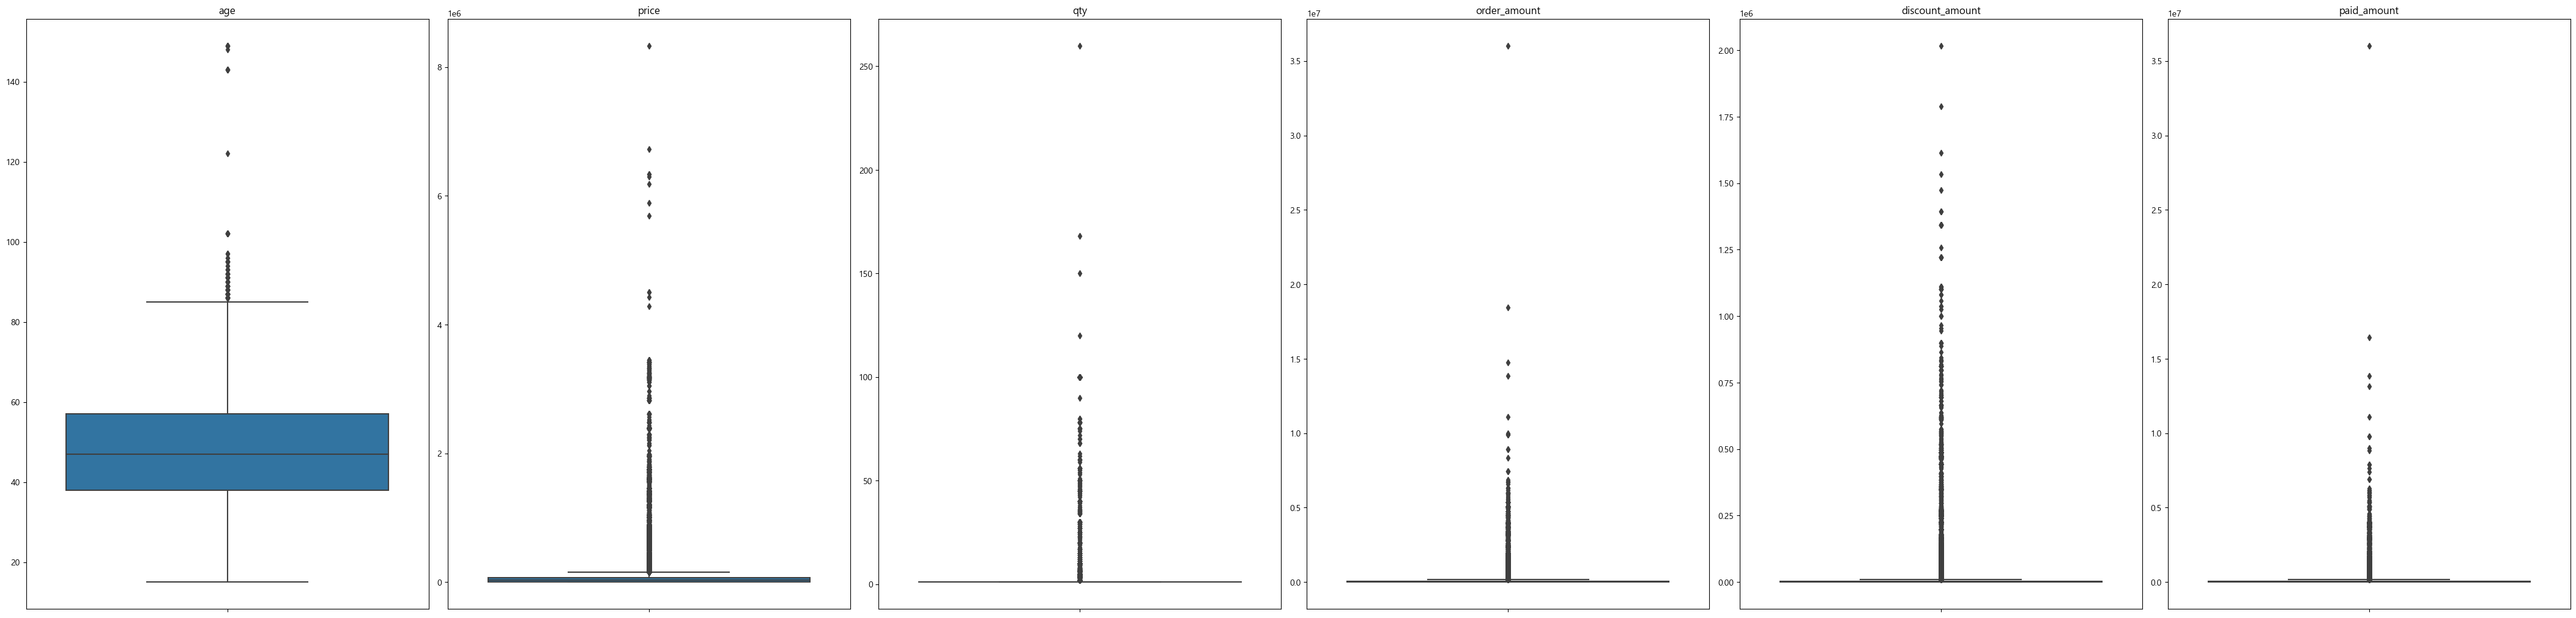

In [10]:
customer_box_plot = customer[['age','price','qty','order_amount','discount_amount','paid_amount']]
customer_box_plot['age'] = customer_box_plot['age'].astype('int64')
columns_to_plot = ['age', 'price', 'qty', 'order_amount', 'discount_amount', 'paid_amount']
n_cols = len(columns_to_plot)

# 서브플롯 생성
fig, axes = plt.subplots(nrows=1, ncols=n_cols, figsize=(n_cols*7, 10), constrained_layout=True)

for i, col in enumerate(columns_to_plot):
    sns.boxplot(y=customer_box_plot[col], ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_ylabel('')

plt.show()

나이가 100 이상인 데이터가 존재하고,\
가격과 수량에 이상치로 추정되는  데이터도 존재하는것으로 보임.\
dataframe 특성상 온라인 판매 플랫폼이기 때문에 나이의 경우 100세 이상의 경우 이상치로 간주하고 제거하고,\
가격과 판매수량의 이상치는 분석한 뒤 처리하기로 함.

> 나이 이상치 제거

In [11]:
age_100_over = customer[customer['age'] > 100]
age_100_over

,customer_no,age,gender,order_no,order_date,channel,item_category,item_code,item_name,price,qty,order_amount,discount_amount,paid_amount
13956,2020087768838,102.0,2,202105187554305,2021-05-18,TV,건강식품,322675570,갱년기,198000,5,990000,153500,836500
29938,2020087768838,102.0,2,202104014708209,2021-04-01,TV,건강식품,322633844,녹용즙,459000,1,459000,33400,425600
42622,2020087431606,143.0,9,202103036266699,2021-03-03,Mobile,건강식품,322423553,농축액,128000,3,384000,0,384000
47292,2020087768838,102.0,2,202106089430620,2021-06-08,TV,건강식품,322675570,갱년기,198000,1,198000,30700,167300
51587,2020087431606,143.0,9,202104064304757,2021-04-06,TV,건강식품,322676462,오메가3,198000,2,396000,99400,296600
53415,2020080345063,149.0,9,202104014463918,2021-04-01,TV,건강식품,322407454,오메가3,198000,5,990000,248500,741500
65046,2020087768838,102.0,2,202105038784675,2021-05-03,TV,건강식품,322675570,갱년기,198000,3,594000,91650,502350
66750,2020080345063,149.0,9,202103154611879,2021-03-15,TV,건강식품,322407454,오메가3,198000,5,990000,248500,741500
67102,2020087431606,143.0,9,202105011265965,2021-05-01,Mobile,건강식품,322423553,농축액,79900,7,559300,67830,491470
68059,2021034904743,122.0,9,202105022625069,2021-05-02,TV,생활용품,322990162,리빙박스,64900,1,64900,8290,56610


In [12]:
customer = customer[customer['age'] < 100]
customer

,customer_no,age,gender,order_no,order_date,channel,item_category,item_code,item_name,price,qty,order_amount,discount_amount,paid_amount
0,2021059651101,68.0,9,202106072433746,2021-06-07,TV,캐쥬얼,323421750,밴딩팬츠,49900,1,49900,4990,44910
1,2018069800502,49.0,2,202105311957155,2021-05-31,TV,레포츠패션,323516657,트랙수트,39000,1,39000,1000,38000
2,2019073300103,35.0,1,202105138020462,2021-05-13,TV,뷰티,323393459,기초세트,72000,2,144000,27600,116400
3,2020075283364,41.0,9,202106171444319,2021-06-17,TV,건강식품,323420069,유산균,119000,2,238000,72920,165080
4,2020104780765,46.0,1,202106024431989,2021-06-02,TV,일반식품,321820178,건강주스,45900,1,45900,2290,43610
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147306,2021010562805,45.0,9,202106018639694,2021-06-01,TV,건강식품,323492393,유산균,99000,3,297000,17700,279300
147307,2019124982759,40.0,2,202104155934763,2021-04-15,TV,뷰티,321803513,파운데이션,69900,20,1398000,346400,1051600
147308,2019083044089,38.0,2,202104026508012,2021-04-02,Mobile,일반식품,320105539,생수,3360,1,3360,0,3360
147309,2019010788799,67.0,1,202103247950735,2021-03-24,Mobile,일반식품,321742510,커피믹스,23500,1,23500,0,23500


>가격, 판매수량 이상치 분석

In [13]:
customer_1 = customer[customer['price'] > 8000000]
customer_1

,customer_no,age,gender,order_no,order_date,channel,item_category,item_code,item_name,price,qty,order_amount,discount_amount,paid_amount
28497,2021029811003,60.0,9,202104134719919,2021-04-13,Mobile,패션잡화,322635031,골드바/코인,8334000,1,8334000,666720,7667280


골드바를 구매한것으로 보인다.\
골드바의 경우 크기에 따라 가격이 매우 높아질 수 있기때문에 이상치로 처리하지 않는다.

In [14]:
customer_1 = customer[customer['qty'] > 250]
customer_1

,customer_no,age,gender,order_no,order_date,channel,item_category,item_code,item_name,price,qty,order_amount,discount_amount,paid_amount
90366,2019123095161,46.0,2,202104197240465,2021-04-19,Mobile,건강식품,322071419,농축액,138600,260,36036000,0,36036000


qty, order_amount, paid_amount가 이상치로 분류된 데이터이다.\
건강식품을 다량 구매해 발생한것으로 보이므로 이상치로 보이지 않는다.

In [15]:
customer_1 = customer[customer['discount_amount'] > 1750000]
customer_1

,customer_no,age,gender,order_no,order_date,channel,item_category,item_code,item_name,price,qty,order_amount,discount_amount,paid_amount
13453,2019124982759,40.0,2,202106220404988,2021-06-22,TV,뷰티,323495974,염색제,79900,70,5593000,1789200,3803800
53956,2020073682406,28.0,2,202101273371932,2021-01-27,Mobile,뷰티,322614329,스킨케어,122950,150,18442500,2017500,16425000


할인율 이상치로 분류된 데이터로, 할인된 가격이 판매금액보다 높지 않기 때문에 정상 데이터로 판단해 이상치로 분류하지 않는다.

## **전체 데이터 EDA**
---

### 기간 별 매출 분석

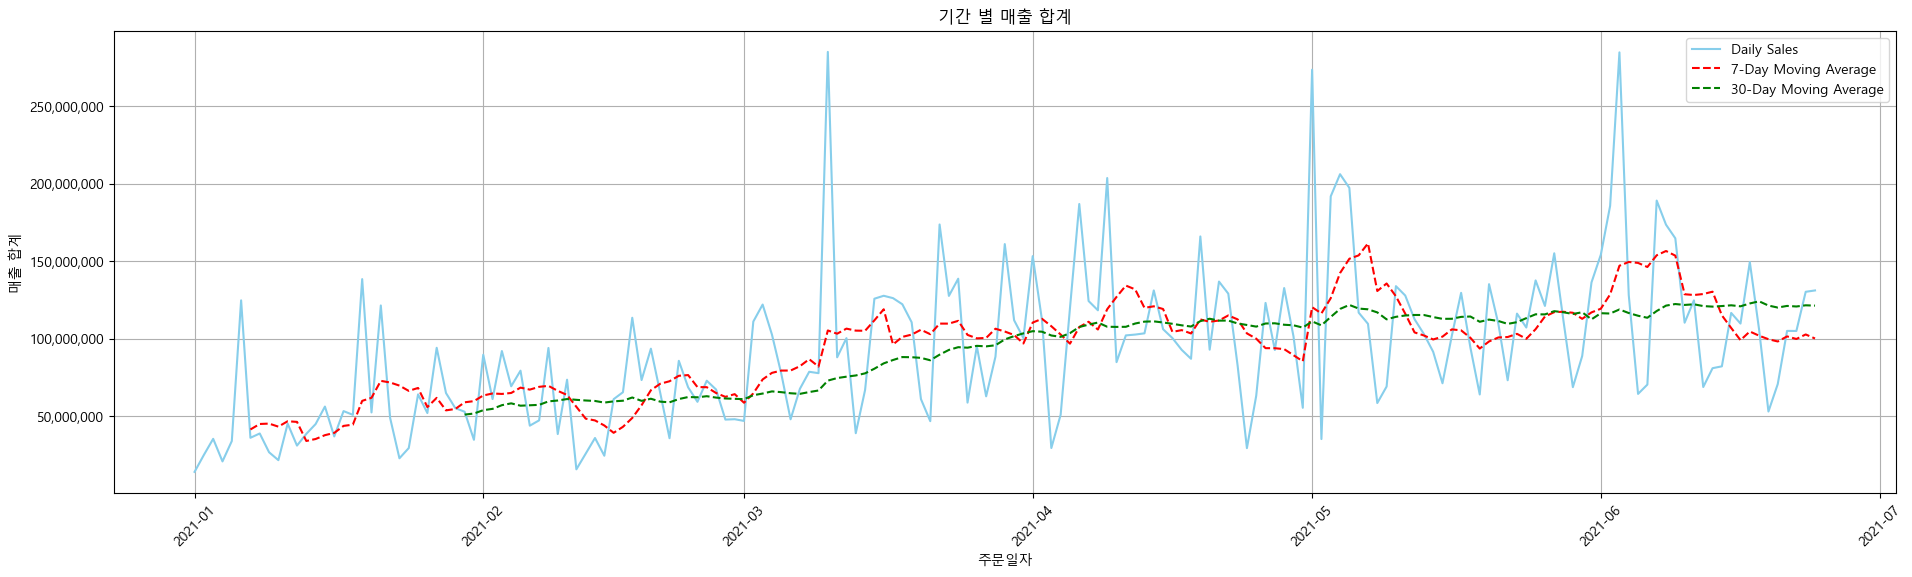

In [16]:
import matplotlib.ticker as mtick

daily_sales = customer.groupby('order_date')['paid_amount'].sum()

# 7일 및 30일 이동 평균 계산
rolling_7d = daily_sales.rolling(window=7).mean()
rolling_30d = daily_sales.rolling(window=30).mean()

# 결과 시각화
plt.figure(figsize=(23, 6))  # 그래프의 크기 설정
plt.plot(daily_sales.index, daily_sales.values, linestyle='-', color='skyblue', label='Daily Sales')
plt.plot(daily_sales.index, rolling_7d, color='red', linestyle='--', label='7-Day Moving Average')
plt.plot(daily_sales.index, rolling_30d, color='green', linestyle='--', label='30-Day Moving Average')

plt.title('기간 별 매출 합계')  # 그래프 제목 설정
plt.xlabel('주문일자')  # x축 레이블 설정
plt.ylabel('매출 합계')  # y축 레이블 설정
plt.xticks(rotation=45)  # x축 레이블 회전
plt.grid(True)  # 그리드 표시

# y축 값을 정수로 표시
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))

plt.legend()
plt.show()

7일 이동평균선의 변화를 보았을때, 매출이 약 우상향하는것을 볼 수 있음.\
2021-3월부터는 월 초에 매출량이 크게 상승하고,월말로 갈 수록 매출량이 감소하는것을 볼 수 있음.


**2021-3월 중순, 2021-05월초, 2021-06초에 매출량이 크게 상승했던 날이 존재함.**

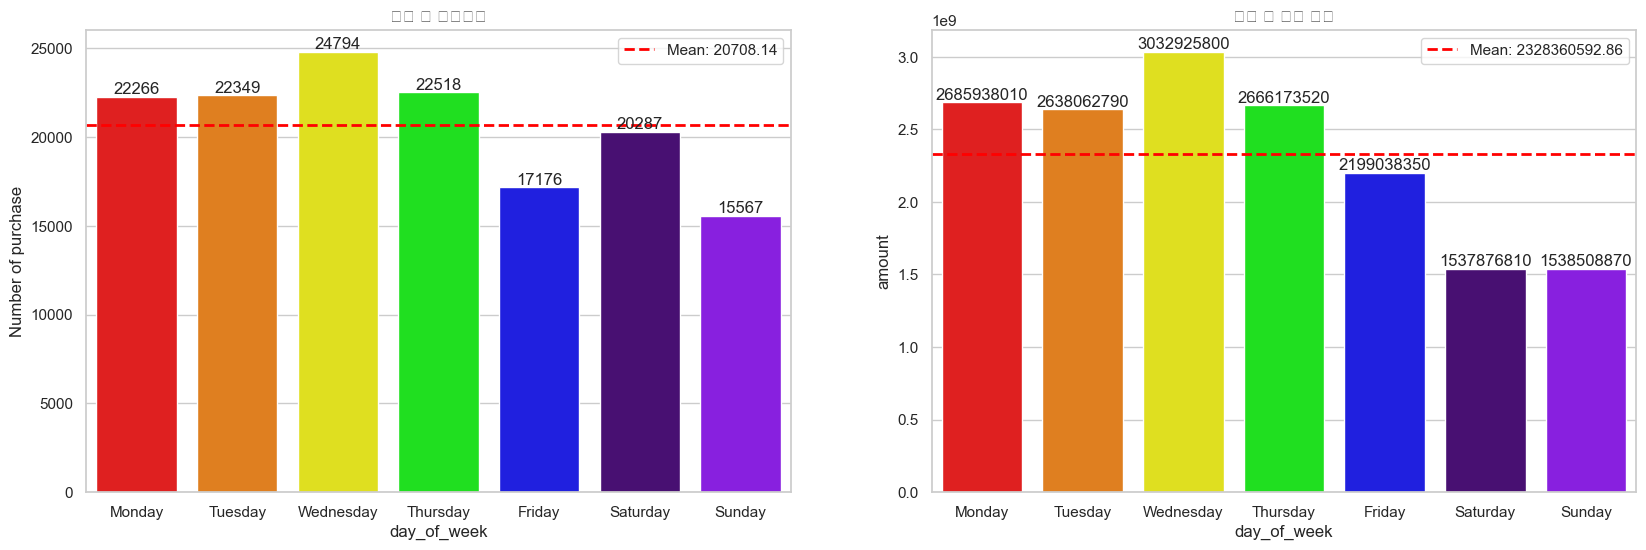

In [17]:
customer['day_of_week'] = customer['order_date'].dt.day_name()

# 고객별 구매 요일별 구매 건수 집계
day_of_week_df = customer[customer['qty'] > 0] # 취소 건 제외
cust_summary = day_of_week_df.groupby(['day_of_week'])['order_no'].nunique().reset_index()

# 요일 순서를 정의
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
# day_of_week를 Categorical 타입으로 변환하고 순서를 지정
cust_summary['day_of_week'] = pd.Categorical(cust_summary['day_of_week'], categories=day_order, ordered=True)
# 요일 순서로 정렬
cust_summary = cust_summary.sort_values('day_of_week')

# 요일별 매출 합계 집계
sales_summary = day_of_week_df.groupby(['day_of_week'])['paid_amount'].sum().reset_index()

# day_of_week를 Categorical 타입으로 변환하고 순서를 지정
sales_summary['day_of_week'] = pd.Categorical(sales_summary['day_of_week'], categories=day_order, ordered=True)

# 요일 순서로 정렬
sales_summary = sales_summary.sort_values('day_of_week')

# 평균 및 중앙값 계산
mean_val = np.mean(cust_summary['order_no'])
mean_val_2 = np.mean(sales_summary['paid_amount'])

# 그래프 스타일 설정
sns.set(style="whitegrid")

# 무지개 색깔 팔레트
rainbow_colors = ['#FF0000', '#FF7F00', '#FFFF00', '#00FF00', '#0000FF', '#4B0082', '#8B00FF']  # 빨주노초파남보 색상

# 서브플롯 설정
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

# 요일별 구매 건수 그래프
ax = sns.barplot(x='day_of_week', y='order_no', palette=rainbow_colors, data=cust_summary, ax=axes[0])
# 평균을 선으로 표시
axes[0].axhline(mean_val, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_val:.2f}')
# 데이터 라벨 표기
for p in ax.patches:
    height = p.get_height()
    axes[0].text(p.get_x() + p.get_width() / 2., height, f'{height:.0f}', ha='center', va='bottom')
# 축 및 제목 설정
axes[0].set_ylabel('Number of purchase')
axes[0].set_title('요일 별 구매건수')
axes[0].legend()

# 요일별 매출 합계 그래프
ax1 = sns.barplot(x='day_of_week', y='paid_amount', palette=rainbow_colors, data=sales_summary, ax=axes[1])
# 평균을 선으로 표시
mean_val_2 = sales_summary['paid_amount'].mean()
axes[1].axhline(mean_val_2, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_val_2:.2f}')
# 데이터 라벨 표기
for p in ax1.patches:
    height = p.get_height()
    axes[1].text(p.get_x() + p.get_width() / 2., height, f'{height:.0f}', ha='center', va='bottom')
# 축 및 제목 설정
axes[1].set_ylabel('amount')
axes[1].set_title('요일 별 매출 합계')
axes[1].legend()



요일 별 구매건수 그래프 **왼쪽**\
요일 별 매출 합계 그래프 **오른쪽** 이다.

   평일의 매출량과, 구매건수가 높게 나타나는것으로 보이며,\
**토요일의 경우 구매건수는 높지만 매출액이 현저히 적은것으로 보아 식료품등의 저가의 물품을 구매하는것으로 추정됨.**

### 재방문 고객 분석

다잇다의 판매 채널은 TV홈쇼핑, 모바일 샵 두가지이다.\
판매 채널별로 재방문 고객을 수치화함으로 채널 별 고객특성을 파악할 수 있을 것이다.

In [18]:
customer_tv = customer[customer['channel'] == 'TV']
customer_mobile = customer[customer['channel'] == 'Mobile']

In [19]:
## 구간 별 재방문율 그래프 시각화
customer_retention_tv = customer_tv.groupby(['customer_no'])['order_no'].count().reset_index()

# order_no 구간 나누기
def label_order_range(row):
    if row['order_no'] == 1:
        return '01 : 최초 방문자'
    elif 2 <= row['order_no'] <= 4:
        return '02 : 2회 이상 방문자'
    elif 5 <= row['order_no'] <= 10:
        return '03 : 5회 이상 방문자'
    else:
        return '04: 10회이상 방문자'

customer_retention_tv['order_range'] = customer_retention_tv.apply(label_order_range, axis=1)

# 구간별 고객 수 계산
order_counts = customer_retention_tv.groupby('order_range').size().reset_index(name='count')

# 데이터를 'order_range' 기준으로 오름차순 정렬
order_counts.sort_values('order_range', inplace=True)

# 전체 고객 수를 사용하여 각 구간의 비율 계산
total_count = customer_retention_tv['customer_no'].count()
order_counts['percentage'] = (order_counts['count'] / total_count * 100).round(2)

# Plotly 막대그래프 생성
fig = px.bar(order_counts, x='order_range', y='count', text='percentage',
             title='TV홈쇼핑 고객 구간 별 재방문율',
             labels={'order_range': '', 'count': '고객 수', 'percentage': 'Percentage'})
fig.update_traces(texttemplate='%{text}%', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.show()

In [20]:
## 구간 별 재방문율 그래프 시각화
customer_retention_mobile = customer_mobile.groupby(['customer_no'])['order_no'].count().reset_index()

# order_no 구간 나누기
def label_order_range(row):
    if row['order_no'] == 1:
        return '01 : 최초 방문자'
    elif 2 <= row['order_no'] <= 4:
        return '02 : 2회 이상 방문자'
    elif 5 <= row['order_no'] <= 10:
        return '03 : 5회 이상 방문자'
    else:
        return '04: 10회이상 방문자'

customer_retention_mobile['order_range'] = customer_retention_mobile.apply(label_order_range, axis=1)

# 구간별 고객 수 계산
order_counts = customer_retention_mobile.groupby('order_range').size().reset_index(name='count')

# 데이터를 'order_range' 기준으로 오름차순 정렬
order_counts.sort_values('order_range', inplace=True)

# 전체 고객 수를 사용하여 각 구간의 비율 계산
total_count = customer_retention_mobile['customer_no'].count()
order_counts['percentage'] = (order_counts['count'] / total_count * 100).round(2)

# Plotly 막대그래프 생성
fig = px.bar(order_counts, x='order_range', y='count', text='percentage',
             title='모바일 고객 구간 별 재방문율',
             labels={'order_range': '', 'count': '고객 수', 'percentage': 'Percentage'})
fig.update_traces(texttemplate='%{text}%', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.show()

In [21]:
import pandas as pd
import plotly.express as px

# TV 홈쇼핑 고객 데이터
customer_retention_tv = customer_tv.groupby(['customer_no'])['order_no'].count().reset_index()

def label_order_range_tv(row):
    if row['order_no'] == 1:
        return '01 : 최초 방문자'
    elif 2 <= row['order_no'] <= 4:
        return '02 : 2회 이상 방문자'
    elif 5 <= row['order_no'] <= 10:
        return '03 : 5회 이상 방문자'
    else:
        return '04: 10회이상 방문자'

customer_retention_tv['order_range'] = customer_retention_tv.apply(label_order_range_tv, axis=1)
customer_retention_tv['source'] = 'TV 홈쇼핑'

# 모바일 고객 데이터
customer_retention_mobile = customer_mobile.groupby(['customer_no'])['order_no'].count().reset_index()

def label_order_range_mobile(row):
    if row['order_no'] == 1:
        return '01 : 최초 방문자'
    elif 2 <= row['order_no'] <= 4:
        return '02 : 2회 이상 방문자'
    elif 5 <= row['order_no'] <= 10:
        return '03 : 5회 이상 방문자'
    else:
        return '04: 10회이상 방문자'

customer_retention_mobile['order_range'] = customer_retention_mobile.apply(label_order_range_mobile, axis=1)
customer_retention_mobile['source'] = '모바일'

# 두 데이터프레임 결합
combined_df = pd.concat([customer_retention_tv, customer_retention_mobile])

# 구간별 고객 수 계산
order_counts_combined = combined_df.groupby(['source', 'order_range']).size().reset_index(name='count')

# 데이터를 'order_range' 기준으로 오름차순 정렬
order_counts_combined.sort_values('order_range', inplace=True)

# 전체 고객 수를 사용하여 각 구간의 비율 계산
total_counts_combined = combined_df.groupby('source')['customer_no'].count().reset_index(name='total_count')
order_counts_combined = order_counts_combined.merge(total_counts_combined, on='source')
order_counts_combined['percentage'] = (order_counts_combined['count'] / order_counts_combined['total_count'] * 100).round(2)

# Plotly 막대그래프 생성
fig = px.bar(order_counts_combined, x='order_range', y='count', color='source', barmode='group', text='percentage',
             title='TV홈쇼핑 및 모바일 고객 구간 별 재방문율',
             labels={'order_range': '주문 구간', 'count': '고객 수', 'percentage': '비율', 'source': '소스'})
fig.update_traces(texttemplate='%{text}%', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.show()

TV홈쇼핑의 경우, 총 구매 건수는 모바일에 비해 높지만, 모바일 고객의 재구매 비율이 압도적으로 높은것으로 보인다.

- TV 홈쇼핑의 경우 고객의 재구매 증가를 위한 전략을 수립해야 할 것이며
- 모바일의 경우 방문 고객을 늘릴 수 있는 전략을 수립해야 할 것임.

### 연령별, 성별 고객 분석

In [22]:
## 연령 구간
bins = [0, 20, 25, 30, 34, 40, 45, 50, 55, 60, 65, float('inf')]
labels = ['20under', '21-25', '26-30', '31-34', '35-40', '41-45','45-50','51-55','56-60','61-65','65over' ]
customer['age_grp'] = pd.cut(customer['age'], bins=bins, labels=labels, right=False)
customer['age_grp'] = customer['age_grp'].astype('object')


##연령 성별 별 집계
age_group_count = customer.groupby(['gender','age_grp'])['customer_no'].count().reset_index()
age_group_count

# gender 값을 컬럼으로 두고 customer_no 집계
pivot_table_result = age_group_count.pivot_table(index='age_grp', columns='gender', values='customer_no', fill_value=0)
pivot_table_df = pd.DataFrame(pivot_table_result.to_records())

pivot_table_df_gender = pivot_table_df.drop('9',axis=1)
pivot_table_df_unknown = pivot_table_df[['age_grp','9']]

In [23]:
# 피라미드 차트로 나타내기 위한 데이터 전처리
age_grp = pivot_table_df['age_grp']
female_data = pivot_table_df['2']*-1
male_data = pivot_table_df['1']

# Created figure
fig = go.Figure()

# Adding Female Data
fig.add_trace(go.Bar(x = female_data,
                    y = age_grp,
                    name = '여성',
                    orientation = 'h',
                    text = -1*female_data))
# Adding Male Data
fig.add_trace(go.Bar(x = male_data,
                    y = age_grp,
                    name = '남성',
                    orientation = 'h',
                    text = male_data))

# Updating the layout for our graph
fig.update_layout(title = '연령대/성별 고객 수 현황',
                 title_font_size = 22,
                 barmode = 'overlay',
                 bargap = 0.0,
                 bargroupgap = 0,
                 xaxis = dict(tickvals = [-12000,-10000,-8000,-6000,-4000,-2000, 0, 2000, 4000, 6000, 8000, 10000, 12000],
                             ticktext = ['1.2만명','1만명','8천명','6천명','4천명','2천명', '0', '2천명', '4천명', '6천명', '8천명', '1만명','1.2만명'],
                             title = '고객 수(백명)',
                             title_font_size = 14))

fig.show()

**고객 수**의 경우 여성이 남성보다 높은 것을 볼 수 있음.\
**25세 이하 고객**의 수가 남성여성 통틀어 매우 적게 분포하고 있으며,\
특히나 **50대 이상의 고객**의 경우에 여성 고객의 수가 남성 고객의 수 보다 **2배** 가량 많은 것을 알 수 있음.

In [24]:
import plotly.express as px
pivot_table_df_unknown_value = pivot_table_df_unknown['9'].value_counts()

fig = px.pie(pivot_table_df_unknown, names='age_grp', values='9', title='성별 미상 고객 연령분포')
fig.update_layout(width=800, height=600)
fig.show()

In [25]:
pivot_table_df_unknown_value

48      1
402     1
1436    1
1786    1
3759    1
4586    1
3957    1
3426    1
2425    1
1855    1
1619    1
Name: 9, dtype: int64

### 카테고리별 판매 수량, 매출 분석

In [26]:
## 카테고리별 판매 수량 분석
category_summary = customer.groupby(['item_category','item_name'])['qty'].sum().reset_index()

# 도넛 차트 생성
fig = px.pie(category_summary, values='qty', names='item_category', title='카테고리 별 판매 수량', hole=0.4)
fig.update_layout(width=800, height=600)
# 차트 표시
fig.show()

**일반 식품, 건강식품, 뷰티, 레포츠 패션, 생활 용품** 등 생필품과 화장품의 비율이 높은 것을 알 수 있다.\
판매량 상위 제품들은 단가가 보통 낮기 때문에 위와같은 경향을 보이는 것으로 추측된다.

In [27]:
# Preparing DataFrames
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

category_amount = customer.groupby(['item_category', 'item_name','channel'])['paid_amount'].sum().reset_index()
category_amount_tv = category_amount[category_amount['channel'] == 'TV'].reset_index()
category_amount_mobile =  category_amount[category_amount['channel'] == 'Mobile'].reset_index()

# Creating subplots
fig = make_subplots(rows=1, cols=3, specs=[[{'type':'domain'}, {'type':'domain'}, {'type':'domain'}]])

# Adding the first pie chart
fig.add_trace(go.Pie(labels=category_amount['item_category'], values=category_amount['paid_amount'], name="General"),
              1, 1)

# Adding the second pie chart
fig.add_trace(go.Pie(labels=category_amount_tv['item_category'], values=category_amount_tv['paid_amount'], name="TV"),
              1, 2)

# Adding the third pie chart
fig.add_trace(go.Pie(labels=category_amount_mobile['item_category'], values=category_amount_mobile['paid_amount'], name="Mobile"),
              1, 3)

# Updating layout for better display
fig.update_traces(hole=0.4, hoverinfo="label+percent+name")

fig.update_layout(
    title_text="카테고리 별 매출 비교",
    annotations=[dict(text='General', x=0.11, y=0.5, font_size=12, showarrow=False),
                 dict(text='TV', x=0.50, y=0.5, font_size=12, showarrow=False),
                 dict(text='Mobile', x=0.89, y=0.5, font_size=12, showarrow=False)],
    width=1200,
    height=600
)

# Show plot
fig.show()

전체 매출 순위는 **대형가전, 건강식품, 생활가전, 일반 식품, 패션잡화** 등으로 나타났다.\
대형 가전, 생활가전의 판매 비율은 2%이지만, 제품 특성 상 판매단가가 높기때문에 이러한 경향이 나타나는 것으로 보임.

TV 홈쇼핑의 주력 상품은 **건강식품, 뷰티**, 모바일 샵의 주력 상품은 **생활가전, 대형가전**으로 플랫폼 별 주력 상품이 존재하는 것을 알 수 있음.

**키즈/유아제품, 여행용품, 반려동물용품, 침구류, 상품권** 카테고리는 판매량과 매출이 모두 저조한것으로 나타남.

#### 카테고리 별 판매 아이템 순위

In [28]:
# 카테고리 별 판매 품목 순위
item_counts = customer.groupby(['item_category', 'item_name']).size().reset_index(name='counts')

item_counts_sorted = item_counts.sort_values(by=['item_category', 'counts'], ascending=[True, False])

category_detail = item_counts_sorted.groupby('item_category')['item_name'].agg(list).reset_index()

category_detail

,item_category,item_name
0,가구/인테리어,"[침대, 황토침대, 의자, 인테리어장식품, 황토카우치, 사무용, 리클라이너소파, 인..."
1,건강식품,"[오메가3, 유산균, 루테인, 농축액, 콜라겐, 기타 건강식품, 흑염소즙, 녹용즙,..."
2,남성의류,"[셔츠, 반팔티, 라운드넥, 데님/스트레이트팬츠, 재킷, 긴팔티, 면/치노팬츠, 카..."
3,대형가전,"[냉장고/냉동고, 일반세탁기, 드럼세탁기, 냉장고, 일반압력밥솥, LED TV, 전..."
4,레저/스포츠,"[베개, 훌라후프, 기타골프용품, 선글라스, 기타용품, 진동운동기, 해먹, 타이어/..."
5,레포츠패션,"[트랙수트, 티셔츠, 트레킹화, 팬츠, 캐쥬얼화, 패딩점퍼, 플리스재킷, 윈드재킷,..."
6,반려용품,"[강아지 간식, 강아지 사료, 고양이 간식(캔/파우치), 목욕/위생/미용용품, 강아..."
7,뷰티,"[기초세트, 파운데이션, 세럼, 남성기초세트, 마스크팩, 염색제, 네일세트, 미스트..."
8,상품권,[모바일 상품권]
9,생활가전,"[핸디형청소기, 드럼세탁기, LED TV, 일반세탁기, 블루투스이어폰, 전기면도기,..."


> 카테고리별 매출 트렌드 분석 (Z차트)

다잇다의 주력 상품인 **대형가전/생활가전/건강식품/일반식품/뷰티/패션잡화** 카테고리의 매출 트렌드를 분석해봄으로써 향후 마케팅 전략 수랍 도움을 주고자 함\
**2021-01부터 2021-06의 6개월의 데이터가 일별로 존재하므로, 15일을 기준으로 전반기 후반기로 나누도록 하며, 이동합계 계산을 위해 2021년 3월 이후의 2분기 데이터를 활용하기로 함**


In [29]:
z_chart_df = customer.groupby(['item_category','order_date'])['paid_amount'].sum().reset_index()
z_chart_df

,item_category,order_date,paid_amount
0,가구/인테리어,2021-01-01,537200
1,가구/인테리어,2021-01-02,1674000
2,가구/인테리어,2021-01-03,698000
3,가구/인테리어,2021-01-04,60620
4,가구/인테리어,2021-01-06,79900
...,...,...,...
3077,패션잡화,2021-06-20,5325270
3078,패션잡화,2021-06-21,5285800
3079,패션잡화,2021-06-22,10204200
3080,패션잡화,2021-06-23,3350460


In [30]:
def classify_date(date):
    if date.day <= 15:
        return '전반기'
    else:
        return '후반기'

# 새 열 'period'에 조건에 따른 값을 할당
z_chart_df['period'] = z_chart_df['order_date'].apply(classify_date)

# '년-월' 열 생성
z_chart_df['year_month'] = z_chart_df['order_date'].dt.to_period('M')

# 각 '년-월', '전반기/후반기' 기준으로 그룹화하여 집계
# 여기서는 'amount'의 합계와 각 그룹의 최댓값 'order_date'를 계산
aggregated_data = z_chart_df.groupby(['item_category','year_month', 'period']).agg({
    'paid_amount': 'sum',
    'order_date': 'max'
}).reset_index()

# 결과 확인
aggregated_data

,item_category,year_month,period,paid_amount,order_date
0,가구/인테리어,2021-01,전반기,11055790,2021-01-15
1,가구/인테리어,2021-01,후반기,15001950,2021-01-31
2,가구/인테리어,2021-02,전반기,9995610,2021-02-15
3,가구/인테리어,2021-02,후반기,20538400,2021-02-28
4,가구/인테리어,2021-03,전반기,13685180,2021-03-15
...,...,...,...,...,...
236,패션잡화,2021-04,후반기,122165550,2021-04-30
237,패션잡화,2021-05,전반기,117099890,2021-05-15
238,패션잡화,2021-05,후반기,144382000,2021-05-31
239,패션잡화,2021-06,전반기,128778820,2021-06-15


### EDA 결과

- 다잇다 플랫폼의 매출액은 2021년 1월부터 7월까지 소폭으로 꾸준히 성장해왔음.

요일별 매출량은\
주말에 비해 평일 매출량이 **1.4**배에서 **2배**가량으로 높은것으로 나타남.


   고객의 평균 연령대는 **40,50대**이며 **특히 35세이상의 여성회원이 주로 사용하는것으로 나타남.**


   약 20개의 아이템 카테고리, 1000여개의 판매 상품이 존재하지만
주력 상품은 **대형가전, 생활가전, 건강식품, 뷰티, 일반식품**이며,\
채널 별 주력 상품의 차이가 존재함.
- TV 채널 : 대형가전, 생활가전
- Mobile 채널 : 건강식품, 뷰티


또한, **TV채널**의 경우 판매량은 많지만, **일회성 구매 고객 수가 약 85%로 매우 높았으며**,\
**Mobile채널**의 경우 판매량은 **TV채널**보다 작지만, **재구매율이 약 57%로 높은 고정 회원을 가지고있음을 알수있음** 


## **다잇다 플랫폼의 추가 구매 유도를 위한 분석방법론**
---
### **RFM 분석을 통한 유저 구매 활동성 분석**

**RFM 세 가지 구성요소**<br>
<br>
- 구매 최근성(Recency) : 마지막 구매 시점이 언제인지를 나타내는 변수로써 산업에 따라 다소 차이가 있지만 일반적으로 최근에 구매한 고객일수록 현재의 관계가 유의 하다고 판단할 수 있음.
- 구매 빈도(Frequency) : 정해진 기간 동안 얼마나 자주 구매했는지를 나타내는 변수로써 동일한 기간 동안 구매횟수가 많을수록 높은 점수를 부과하며, 고객의 구매/이용활동성 판단이 가능
- 구매 금액(Monetary) : 일정 기간 동안에 고객의 총 구매 금액을 나타내는 변수로써, 구매액이 높을 수록 높은 점수를 획득을 할 수 있으나, 지나치게 높은 구매액이 존재할 경우 상한선을 두는 것이 RFM 지수 왜곡을 방지할 수 있음.

분기별로 구매고객을 나누어 2021년 1분기에 비해 2021년 2분기의 고객 RFM 지수의 변화 분석

- 2021년 6월 기준으로 지난 3개월간 RFM 지수를 측정
- 2021년 3월 기준으로 지난 3개월간 RFM 지수를 측정

> 분석용 dataset 생성

In [31]:
customer_model = customer
customer_model

,customer_no,age,gender,order_no,order_date,channel,item_category,item_code,item_name,price,qty,order_amount,discount_amount,paid_amount,day_of_week,age_grp
0,2021059651101,68.0,9,202106072433746,2021-06-07,TV,캐쥬얼,323421750,밴딩팬츠,49900,1,49900,4990,44910,Monday,65over
1,2018069800502,49.0,2,202105311957155,2021-05-31,TV,레포츠패션,323516657,트랙수트,39000,1,39000,1000,38000,Monday,45-50
2,2019073300103,35.0,1,202105138020462,2021-05-13,TV,뷰티,323393459,기초세트,72000,2,144000,27600,116400,Thursday,35-40
3,2020075283364,41.0,9,202106171444319,2021-06-17,TV,건강식품,323420069,유산균,119000,2,238000,72920,165080,Thursday,41-45
4,2020104780765,46.0,1,202106024431989,2021-06-02,TV,일반식품,321820178,건강주스,45900,1,45900,2290,43610,Wednesday,45-50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147306,2021010562805,45.0,9,202106018639694,2021-06-01,TV,건강식품,323492393,유산균,99000,3,297000,17700,279300,Tuesday,45-50
147307,2019124982759,40.0,2,202104155934763,2021-04-15,TV,뷰티,321803513,파운데이션,69900,20,1398000,346400,1051600,Thursday,41-45
147308,2019083044089,38.0,2,202104026508012,2021-04-02,Mobile,일반식품,320105539,생수,3360,1,3360,0,3360,Friday,35-40
147309,2019010788799,67.0,1,202103247950735,2021-03-24,Mobile,일반식품,321742510,커피믹스,23500,1,23500,0,23500,Wednesday,65over


In [32]:
# RFM 분석 데이터프레임 생성
rfm_now = customer_model.query("'2021-01-01' <= order_date < '2021-04-01'")
rfm_before = customer_model.query("'2021-04-01' <= order_date <= '2021-06-24'")

# 2013년 12월 기준 RFM 데이터의 시작일자와 종료일자 확인
print(min(rfm_now['order_date'].unique()))
print(max(rfm_now['order_date'].unique()))

# 2013년 06월 기준 RFM 데이터의 시작일자와 종료일자 확인
print(min(rfm_before['order_date'].unique()))
print(max(rfm_before['order_date'].unique()))

2021-01-01T00:00:00.000000000
2021-03-31T00:00:00.000000000
2021-04-01T00:00:00.000000000
2021-06-24T00:00:00.000000000


구매 날짜가 2021-01-01 부터 2021-03-31의 1분기 고객 데이터와\
구매 날짜가 2021-04-01 부터 2021-06-24의 2분기 고객 데이터를 생성했다.


#### recency(구매 최근성), monetary(구매 금액), frequency(구매 빈도) 파생변수 생성

In [33]:
# 각 기간의 RFM 최근성 기준 측정 기준일
now_std_date = max(rfm_now['order_date'])
before_std_date = max(rfm_before['order_date'])

print(now_std_date)
print(before_std_date)

2021-03-31 00:00:00
2021-06-24 00:00:00


In [34]:
# now 기준
rfm_user_now = rfm_now.groupby('customer_no').agg({
    'order_date': lambda x: (now_std_date - x.max()).days,
    'paid_amount': lambda x: x.sum(),
    'order_no': lambda x: x.nunique()
})

# 컬럼 이름 변경
rfm_user_now.columns = ['recency', 'monetary', 'frequency']

# 결과 출력
rfm_user_now

,recency,monetary,frequency
customer_no,,,
2015010000596,75,46130,1
2015010000652,25,10930,1
2015010001152,8,178070,4
2015010001213,34,59020,1
2015010001954,28,38900,1
...,...,...,...
2021037763588,0,118000,1
2021037779592,0,69000,1
2021037788733,0,69000,1


In [32]:
# before 기준
rfm_user_before = rfm_before.groupby('customer_no').agg({
    'order_date': lambda x: (before_std_date - x.max()).days,
    'paid_amount': lambda x: x.sum(),
    'order_no': lambda x: x.nunique()
})

# 컬럼 이름 변경
rfm_user_before.columns = ['recency', 'monetary', 'frequency']

# 결과 출력
rfm_user_before

,recency,monetary,frequency
customer_no,,,
2015010000596,21,28410,1
2015010001152,30,143820,2
2015010004299,71,560150,1
2015010004451,17,48900,1
2015010005813,35,14900,1
...,...,...,...
2021069984125,20,38000,1
2021069986151,20,38000,1
2021069994005,16,32300,1


**RFM 지수** 측정을 위해 각 요소별 레벨을 부여합니다.

In [33]:
# now 기준
rfm_user_now['recency_score'] = pd.qcut(rfm_user_now['recency'], 3, labels=[3, 2, 1])
rfm_user_now['monetary_score'] = pd.qcut(rfm_user_now['monetary'], 3, labels=[1, 2, 3])

# Frequency 점수 계산
rfm_user_now['frequency_score'] = rfm_user_now['frequency'].apply(lambda x: 1 if x == 1 else (2 if x == 2 else 3))
rfm_user_now['rm_index'] = rfm_user_now['recency_score'].astype(str) + rfm_user_now['monetary_score'].astype(str)
rfm_user_now.reset_index(inplace=True)
rfm_user_now.head(10)

,customer_no,recency,monetary,frequency,recency_score,monetary_score,frequency_score,rm_index
0,2015010000596,75,46130,1,1,2,1,12
1,2015010000652,25,10930,1,2,1,1,21
2,2015010001152,8,178070,4,3,3,3,33
3,2015010001213,34,59020,1,2,3,1,23
4,2015010001954,28,38900,1,2,2,1,22
5,2015010004451,69,68000,1,1,3,1,13
6,2015010008884,5,105700,3,3,3,3,33
7,2015010076812,50,48900,1,1,2,1,12
8,2015020015123,72,127200,1,1,3,1,13
9,2015020082265,69,58900,1,1,2,1,12


In [34]:
# before 기준
rfm_user_before['recency_score'] = pd.qcut(rfm_user_before['recency'], 3, labels=[3, 2, 1])
rfm_user_before['monetary_score'] = pd.qcut(rfm_user_before['monetary'], 3, labels=[1, 2, 3])
# Frequency 점수 계산
rfm_user_before['frequency_score'] = rfm_user_before['frequency'].apply(lambda x: 1 if x == 1 else (2 if x == 2 else 3))
rfm_user_before['rm_index'] = rfm_user_before['recency_score'].astype(str) + rfm_user_before['monetary_score'].astype(str)
rfm_user_before.reset_index(inplace=True)
rfm_user_before.head(10)

,customer_no,recency,monetary,frequency,recency_score,monetary_score,frequency_score,rm_index
0,2015010000596,21,28410,1,3,2,1,32
1,2015010001152,30,143820,2,2,3,2,23
2,2015010004299,71,560150,1,1,3,1,13
3,2015010004451,17,48900,1,3,2,1,32
4,2015010005813,35,14900,1,2,1,1,21
5,2015010008884,13,11900,1,3,1,1,31
6,2015010009464,20,41420,1,3,2,1,32
7,2015010034753,47,38000,1,2,2,1,22
8,2015020012649,26,48550,1,2,2,1,22
9,2015020059941,14,97000,2,3,3,2,33


DATA 특성상, frequency(구매 횟수)의 비율이 1,2인 경우가 압도적으로 많아 데이터를 균등하게 나눌 수 없어\
구매횟수가 1일경우 1점, 2일경우 2점, 나머지일 경우 3점을 부여함.

>RFM 지수 분석

In [35]:
# 각 스코어별 기준 라인 비교
## recency_score
print("2021년 2분기 기준 Recency 스코어 구간")
print(rfm_user_now.groupby(['recency_score'])['recency'].min().reset_index())
print()
print("2021년 1분기 기준 Recency 스코어 구간")
print(rfm_user_before.groupby(['recency_score'])['recency'].min().reset_index())

2021년 2분기 기준 Recency 스코어 구간
  recency_score  recency
0             3        0
1             2       17
2             1       44

2021년 1분기 기준 Recency 스코어 구간
  recency_score  recency
0             3        0
1             2       23
2             1       54


구매 최근성의 경우 2분기가 1분기에 비해 최신성이 약 1~2주 증가했다고 볼 수 있음.\
이는 다잇다 플랫폼이 재구매까지 걸리는 시간을 단축시키고 구매활동성을 증겨시켰다고 해석됨

In [36]:
# 각 스코어별 기준 라인
## monetary_score
print("2021년 2분기 기준 Monetary 스코어 구간")
print(rfm_user_now.groupby(['monetary_score'])['monetary'].min().reset_index())
print()
print("2021년 1분기 기준 Monetary 스코어 구간")
print(rfm_user_before.groupby(['monetary_score'])['monetary'].min().reset_index())

2021년 2분기 기준 Monetary 스코어 구간
  monetary_score  monetary
0              1       190
1              2     28920
2              3     58920

2021년 1분기 기준 Monetary 스코어 구간
  monetary_score  monetary
0              1       150
1              2     20890
2              3     55270


구매 금액 또한 1분기에 비해 상승한것을 볼 수 있음.\
특히 스코어 2의 고객의 경우 구매금액이 크게 상승한것으로 나타남.

In [37]:
# 각 스코어별 기준 라인
## frequency_score
print("2021년 2분기 기준 Frequency 스코어 구간")
print(rfm_user_now.groupby(['frequency_score'])['frequency'].min().reset_index())
print()
print("2021년 1분기 기준 Frequency 스코어 구간")
print(rfm_user_before.groupby(['frequency_score'])['frequency'].min().reset_index())

2021년 2분기 기준 Frequency 스코어 구간
   frequency_score  frequency
0                1          1
1                2          2
2                3          3

2021년 1분기 기준 Frequency 스코어 구간
   frequency_score  frequency
0                1          1
1                2          2
2                3          3


구매 빈도의 경우, 데이터의 분포가 2분기와 1분기의 차이가 없는것으로 나타남.\
하지만 이것은 데이터 분포가 고르지 못하기 떄문에 발생한것으로 추정됨.\
**구매 빈도의 경우 RFM분석에 큰 영향을 주지 못할 것**

#### RFM 지수 별 고객 세그먼트 분류

frequency의 경우, 1과 2의 비중이 너무 높기때문에 분석에 포함시키기에 적합하지 않다고 판단,\
구매 금액과 구매 최근성을 바탕으로 세그먼트를 분류함.

**RM지수**
- 11 = 휴먼상태 집단
- 31, 21 = 최신성이 존재하지만, 구매 금액이 적어 구매 유도 전략이 필요한 집단
- 12, 13 = 구매 금액이 크지만, 최신성이 낮아 Win-Back 전략을 통해 플랫폼 재사용을 유도해야 하는 집단
- 32, 23, 22 = 우수고객 집단
- 33 = 최우수고객 집단

In [38]:
def categorize_customer(score):
    if score == '33' :
        return '1_최우수'
    elif score in ['32', '23', '22']:
        return '2_우수'
    elif score in ['12', '13']:
        return '3_윈백대상'
    elif score in ['31', '21']:
        return '4_최신성존재_구매필요'
    elif score in ['11']:
        return '5_휴면'
    
    
rm_index_now = rfm_user_now.groupby('rm_index')['customer_no'].nunique().reset_index().rename({'customer_no':'customer_count'}, axis=1)
rm_index_now['category'] = rm_index_now['rm_index'].apply(categorize_customer)

# 확인
rm_index_now

,rm_index,customer_count,category
0,11,2683,5_휴면
1,12,4904,3_윈백대상
2,13,4753,3_윈백대상
3,21,4454,4_최신성존재_구매필요
4,22,4509,2_우수
5,23,3423,2_우수
6,31,5764,4_최신성존재_구매필요
7,32,3493,2_우수
8,33,3855,1_최우수


In [39]:
def categorize_customer(score):
    if score == '33' :
        return '1_최우수'
    elif score in ['32', '23', '22']:
        return '2_우수'
    elif score in ['12', '13']:
        return '3_윈백대상'
    elif score in ['31', '21']:
        return '4_최신성존재_구매필요'
    elif score in ['11']:
        return '5_휴면'
    
    
rm_index_before = rfm_user_before.groupby('rm_index')['customer_no'].nunique().reset_index().rename({'customer_no':'customer_count'}, axis=1)
rm_index_before['category'] = rm_index_before['rm_index'].apply(categorize_customer)

# 확인
rm_index_before

,rm_index,customer_count,category
0,11,4781,5_휴면
1,12,5705,3_윈백대상
2,13,4676,3_윈백대상
3,21,5634,4_최신성존재_구매필요
4,22,4827,2_우수
5,23,5073,2_우수
6,31,4993,4_최신성존재_구매필요
7,32,4872,2_우수
8,33,5655,1_최우수


#### 고객 세그먼트 시각화

In [40]:
# 차트 그리기 (now)
# 트리맵 차트 시각화
fig = px.treemap(rm_index_now,
                 path = ['category'],
                 values = 'customer_count',
                 color_continuous_scale = 'viridis',
                 custom_data=['customer_count'])

# 트리맵에 데이터 표시
for trace in fig.data:
    trace.hovertemplate = '%{label}<br>고객 수: %{customdata[0]}'  # 'customer_count'를 '고객 수'로 변경

# 차트 타이틀 추가
fig.update_layout(title_text='2021년 2분기 기준 RM 세그먼트 단위 고객 수 현황')

fig.show()

In [41]:
# 차트 그리기 (이전)
# 트리맵 차트 시각화
fig = px.treemap(rm_index_before,
                 path = ['category'],
                 values = 'customer_count',
                 color_continuous_scale = 'viridis',
                 custom_data=['customer_count'])

# 트리맵에 데이터 표시
for trace in fig.data:
    trace.hovertemplate = '%{label}<br>고객 수: %{customdata[0]}'  # 'customer_count'를 '고객 수'로 변경

# 차트 타이틀 추가
fig.update_layout(title_text='2021년 1분기 기준 RM 세그먼트 단위 고객 수 현황')

fig.show()

> 구매 활동성 비교분석

1분기와 2분기에 모두 구매한 이력을 가지고 있는 고객을 대상으로\
RFM지수에 가중치를 부여해 RFM점수를 환산하고 분기별 RFM점수를 비교해 구매 활동성의 변화를 분석해보도록함.\
가중치의 경우, 다소 신뢰성이 떨어지는 구매 빈도에 0.2를 부여하고 구매주기, 구매금액에 0.4씩 부여해 산정함. 

In [42]:
# 2021년 6월 기준
rfm_user_now['overall_score'] = rfm_user_now['recency_score'].astype(int)*0.4 + rfm_user_now['monetary_score'].astype(int)*0.4 + rfm_user_now['frequency_score'].astype(int)*0.2

# 2021년 3월 기준
rfm_user_before['overall_score'] = rfm_user_before['recency_score'].astype(int)*0.4 + rfm_user_before['monetary_score'].astype(int)*0.4 + rfm_user_before['frequency_score'].astype(int)*0.2

In [43]:
# 오버롤 비교 데이터프레임 생성 (단, 양 기간 비교를 위해 inner join으로 연결)
merged_df = pd.merge(rfm_user_now[['customer_no', 'overall_score']], rfm_user_before[['customer_no', 'overall_score']], on='customer_no', how='inner')
merged_df = merged_df.rename(columns={'overall_score_x': 'now_score', 'overall_score_y': 'before_score'})
merged_df['score_status'] = np.where(merged_df['now_score'] > merged_df['before_score'], '1_상승',
                                     np.where(merged_df['now_score'] == merged_df['before_score'], '2_동일', '3_하락'))
merged_df

,customer_no,now_score,before_score,score_status
0,2015010000596,1.4,2.2,3_하락
1,2015010001152,3.0,2.4,1_상승
2,2015010004451,1.8,2.2,3_하락
3,2015010008884,3.0,1.8,1_상승
4,2015020094111,2.4,3.0,3_하락
...,...,...,...,...
12023,2021037472523,2.6,2.6,1_상승
12024,2021037475676,2.6,1.8,1_상승
12025,2021037499556,2.6,2.6,1_상승
12026,2021037499951,2.6,2.6,1_상승


In [44]:
# 상태별 고객 수 확인
score_stat = merged_df.groupby(['score_status'])['customer_no'].nunique().reset_index().rename({'customer_no':'고객 수'}, axis=1)

# 고객 수 합계 추가
score_stat = score_stat.append({'score_status': 'Total', '고객 수': score_stat['고객 수'].sum()}, ignore_index=True)

# 결과 출력
score_stat

,score_status,고객 수
0,1_상승,4845
1,2_동일,2224
2,3_하락,4959
3,Total,12028


> 결과 정리

다잇다 플랫폼은 높은 구매활동성을 가진(우수, 최우수)고객층을 상당수 보유하고 있지만,\
2분기에 들어서 이들의 비율이 소폭 감소한것으로 나타났음.

하지만 휴면고객의 비중이 낮아지고 새로운 고객의 수가 증가하는 긍정적인면 또한 존재하는것으로 나타남.

다잇다 플랫폼은 

- 구매활동성이 높은 고객을 유지하기 위한 멤버십 전략 
- 돌아온 휴면 고객과 구매 금액이 적은 고객들에게 마케팅 전략
- 구매 최신성이 높은 고객에게 재구매 유도 전략

위와같은 전략을 수립함으로써 고객의 추가 구매를 유도해 볼 수 있을 것임.



## LTV(고객 생애가치) 증진 전략

다잇다 플랫폼은 모바일 고객의 1회 이상 구매고객(재방문률)이 57%정도임,
따라서 이들의 특성을 파악해 구매 활동성을 높이는 전략을 활용할것.

LTV는 고객이 평생동안 기업에게 어느 정도의 금전적 가치를 가져다 주는지를 정량화한 지표로, 고객별 미래의 예상 구매 횟수 * 예상 평균 수익으로 계산됩니다.\
미래의 예상 구매 횟수는 BG/NBD 모형을 통해 산출되며, 이를 위해 R (Recency), F (Frequency), T (Time) 정보가 필요합니다.\
미래의 예상 평균 수익은 Gamma-Gamma 모형을 통해 산출되며, 이를 위해 F (Frequency), M (Monetary Value) 정보가 필요합니다.\
그래서 저희는 구매 기록 데이터의 R, F, M, T를 구해 BG/NBD 모형과 Gamma-Gamma 모형을 각각 적합해 LTV를 구할 것입니다.

In [35]:
import pandas as pd
import warnings
import os
import numpy as np
import matplotlib.pyplot as plt

from datetime import datetime
from datetime import timedelta

from lifetimes.plotting import *
from lifetimes.utils import *
from lifetimes import BetaGeoFitter
from lifetimes.fitters.gamma_gamma_fitter import GammaGammaFitter

from hyperopt import hp, fmin, tpe, rand, SparkTrials, STATUS_OK, space_eval, Trials


warnings.filterwarnings('ignore')

In [36]:
# 모바일 고객 로드
customer_mobile

,customer_no,age,gender,order_no,order_date,channel,item_category,item_code,item_name,price,qty,order_amount,discount_amount,paid_amount,day_of_week
6,2020016102337,38.0,2,202104281179298,2021-04-28,Mobile,일반식품,320105541,생수,5700,2,11400,0,11400,Wednesday
7,2019097045198,47.0,2,202102081146588,2021-02-08,Mobile,일반식품,321658904,떡,21000,1,21000,1050,19950,Monday
10,2019021890482,31.0,2,202104268188869,2021-04-26,Mobile,일반식품,320105539,생수,3150,1,3150,0,3150,Monday
11,2019085841643,38.0,2,202105137706872,2021-05-13,Mobile,대형가전,323032359,노트북,1380000,1,1380000,69000,1311000,Thursday
13,2018071083135,46.0,2,202102286391784,2021-02-28,Mobile,일반식품,322614618,생수,3300,1,3300,0,3300,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147304,2020062761241,56.0,2,202102222157188,2021-02-22,Mobile,일반식품,321043461,생수,6600,1,6600,0,6600,Monday
147305,2019012105193,41.0,2,202105208867287,2021-05-20,Mobile,일반식품,321089035,건강음료,3500,1,3500,0,3500,Thursday
147308,2019083044089,38.0,2,202104026508012,2021-04-02,Mobile,일반식품,320105539,생수,3360,1,3360,0,3360,Friday
147309,2019010788799,67.0,1,202103247950735,2021-03-24,Mobile,일반식품,321742510,커피믹스,23500,1,23500,0,23500,Wednesday


In [37]:
#RFM 측정을 위한 칼럼 떼어내기
customer_mobile_seg = customer_mobile[['customer_no','order_date','paid_amount']]
customer_mobile_seg

,customer_no,order_date,paid_amount
6,2020016102337,2021-04-28,11400
7,2019097045198,2021-02-08,19950
10,2019021890482,2021-04-26,3150
11,2019085841643,2021-05-13,1311000
13,2018071083135,2021-02-28,3300
...,...,...,...
147304,2020062761241,2021-02-22,6600
147305,2019012105193,2021-05-20,3500
147308,2019083044089,2021-04-02,3360
147309,2019010788799,2021-03-24,23500


In [38]:
customer_mobile_seg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84375 entries, 6 to 147310
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   customer_no  84375 non-null  int64         
 1   order_date   84375 non-null  datetime64[ns]
 2   paid_amount  84375 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 2.6 MB


모든 데이터의 NOT-NULL을 확인

### R(recency), F(frequency), M(monetary_value), T(time) 변수 생성

In [39]:
customer_mobile_seg['order_date'] = pd.to_datetime(customer_mobile_seg['order_date']).dt.date

current_date = customer_mobile_seg['order_date'].max()

metrics_df = summary_data_from_transaction_data(customer_mobile_seg
                                          , customer_id_col = 'customer_no'
                                          , datetime_col = 'order_date'
                                          , monetary_value_col='paid_amount'
                                          , observation_period_end=current_date)

# monetary_value 컬럼을 정수로 변환
metrics_df['monetary_value'] = metrics_df['monetary_value'].astype(int)

metrics_df.head()

,frequency,recency,T,monetary_value
customer_no,,,,
2015010000596,0.0,0.0,21.0,0
2015010000652,0.0,0.0,110.0,0
2015010001152,0.0,0.0,114.0,0
2015010004299,0.0,0.0,71.0,0
2015010005813,0.0,0.0,35.0,0


### Train / Test Dataset 생성

In [40]:
holdout_days = 40
calibration_end_date = current_date - timedelta(days = holdout_days)

metrics_cal_df = calibration_and_holdout_data(customer_mobile_seg
                                          ,customer_id_col = 'customer_no'
                                          ,datetime_col = 'order_date'
                                          ,calibration_period_end=calibration_end_date # train 데이터 기간
                                          ,observation_period_end=current_date         # 끝 기간
                                          ,monetary_value_col='paid_amount')


metrics_cal_df.head()

,frequency_cal,recency_cal,T_cal,monetary_value_cal,frequency_holdout,monetary_value_holdout,duration_holdout
customer_no,,,,,,,
2015010000652,0.0,0.0,70.0,0.0,0.0,0.0,40.0
2015010001152,0.0,0.0,74.0,0.0,0.0,0.0,40.0
2015010004299,0.0,0.0,31.0,0.0,0.0,0.0,40.0
2015010008884,2.0,55.0,105.0,35700.0,0.0,0.0,40.0
2015020087781,0.0,0.0,38.0,0.0,0.0,0.0,40.0


In [41]:
## frequency가 0인 것은 제외하기
whole_filtered_df = metrics_df[metrics_df.frequency > 0]
filtered_df       = metrics_cal_df[metrics_cal_df.frequency_cal > 0]

In [42]:
whole_filtered_df.describe()

,frequency,recency,T,monetary_value
count,15078.000000,15078.000000,15078.000000,1.507800e+04
mean,3.275368,73.970023,109.529977,6.178984e+04
std,4.308775,40.303785,35.873918,6.597098e+05
min,1.000000,1.000000,2.000000,5.800000e+02
25%,1.000000,40.000000,84.000000,3.302000e+03
50%,2.000000,72.000000,115.000000,3.900000e+03
75%,4.000000,105.000000,140.000000,1.523925e+04
max,99.000000,172.000000,174.000000,5.131596e+07


In [43]:
filtered_df.describe()

,frequency_cal,recency_cal,T_cal,monetary_value_cal,frequency_holdout,monetary_value_holdout,duration_holdout
count,11936.000000,11936.000000,11936.000000,1.193600e+04,11936.000000,1.193600e+04,11936.0
mean,2.811746,56.780747,80.371397,6.517487e+04,0.993549,2.708206e+04,40.0
std,3.469926,29.610502,27.732764,1.039227e+06,1.580635,1.543312e+05,0.0
min,1.000000,1.000000,3.000000,5.800000e+02,0.000000,0.000000e+00,40.0
25%,1.000000,31.000000,56.000000,3.290000e+03,0.000000,0.000000e+00,40.0
50%,2.000000,59.000000,83.000000,3.600000e+03,1.000000,3.260000e+03,40.0
75%,3.000000,80.000000,103.000000,1.090000e+04,1.000000,4.240000e+03,40.0
max,75.000000,131.000000,134.000000,9.163600e+07,30.000000,6.151680e+06,40.0


### 최적 하이퍼파라미터 설정(L2 penalty)

In [44]:
# 평가 지표: default는 MSE
def score_model(actuals, predicted, metric='mse'):

    metric = metric.lower()

    # MSE / RMSE
    if metric == 'mse' or metric == 'rmse':
        mse_val = np.sum(np.square(actuals - predicted)) / actuals.shape[0]
        if metric == 'rmse':
            val = np.sqrt(mse_val)
        else:
            val = mse_val
    # MAE
    elif metric == 'mae':
        val = np.sum(np.abs(actuals - predicted)) / actuals.shape[0]
    else:
        val = None

    return val

# BG/NBD 모형 평가
def evaluate_bgnbd_model(param):

    data   = inputs
    l2_reg = param

    # 모형 적합
    model = BetaGeoFitter(penalizer_coef=l2_reg)
    model.fit(data['frequency_cal'], data['recency_cal'], data['T_cal'])

    # 모형 평가
    frequency_actual = data['frequency_holdout']
    frequency_predicted = model.predict(data['duration_holdout']
                                        , data['frequency_cal']
                                        , data['recency_cal']
                                        , data['T_cal']
                                       )
    mse = score_model(frequency_actual, frequency_predicted, 'mse')

    return {'loss': mse, 'status': STATUS_OK}

# Gamma/Gamma 모델 평가
def evaluate_gg_model(param):

    data   = inputs
    l2_reg = param

    # GammaGamma 모형 적합
    model = GammaGammaFitter(penalizer_coef=l2_reg)
    model.fit(data['frequency_cal'], data['monetary_value_cal'])

    # 모형 평가
    monetary_actual = data['monetary_value_holdout']
    monetary_predicted = model.conditional_expected_average_profit(data['frequency_holdout'], data['monetary_value_holdout'])
    mse = score_model(monetary_actual, monetary_predicted, 'mse')

    # return score and status
    return {'loss': mse, 'status': STATUS_OK}

#### BG/NBD model 최적화 param

In [45]:
search_space = hp.uniform('l2', 0.1, 1.0)
algo = tpe.suggest
trials = Trials()
inputs = filtered_df

argmin = fmin(
  fn = evaluate_bgnbd_model, # 목적함수
  space = search_space,      # 파라미터 공간
  algo = algo,               # 최적화 알고리즘: Tree of Parzen Estimators (TPE)
  max_evals=100,             # 반복수
  trials=trials            
  )

l2_bgnbd = space_eval(search_space,argmin)
print(l2_bgnbd)

100%|██████████| 100/100 [00:59<00:00,  1.68trial/s, best loss: 1.5322222395298395]
0.14208621847436168


#### Gamma-Gamma model 최적화 param

In [46]:
trials = Trials()

# GammaGamma
argmin = fmin(
  fn = evaluate_gg_model,
  space = search_space,
  algo = algo,
  max_evals=100,
  trials=trials
  )

l2_gg = space_eval(search_space,argmin)
print(l2_gg)

100%|██████████| 100/100 [00:07<00:00, 12.54trial/s, best loss: 134531307894.04509]
0.22485102150045638


In [47]:
lifetimes_model = BetaGeoFitter(penalizer_coef=l2_bgnbd) #l2_bgnbd = hyperopt로 나온 결과
# calibration 데이터의 R,F,T로 모형 적합
lifetimes_model.fit(filtered_df['frequency_cal'], filtered_df['recency_cal'], filtered_df['T_cal']) 

# holdout 데이터로 모델 평가: F의 실제값과 예측값의 MSE
frequency_actual = filtered_df['frequency_holdout']
frequency_predicted = lifetimes_model.predict(filtered_df['duration_holdout']
                                    ,filtered_df['frequency_cal']
                                    , filtered_df['recency_cal']
                                    , filtered_df['T_cal'])
mse = score_model(frequency_actual, frequency_predicted, 'mse')
print('MSE: {0}'.format(mse))

MSE: 1.5322222395298395


#### 모수 측정

In [48]:
lifetimes_model.summary

,coef,se(coef),lower 95% bound,upper 95% bound
r,0.981755,0.010055,0.962047,1.001464
alpha,27.331837,0.413537,26.521305,28.142369
a,0.000294,0.000440,-0.000568,0.001157
b,0.011639,0.016836,-0.021359,0.044637


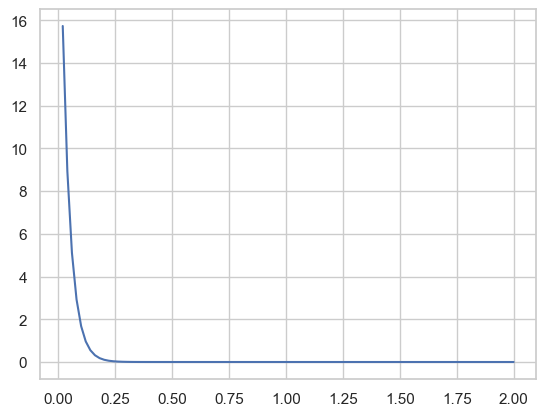

In [49]:
# 고객별 lambda (구매율) 의 분포
from scipy.stats import gamma
import matplotlib.pyplot as plt

coefs = lifetimes_model.summary['coef']
x = np.linspace (0, 2, 100) 
y = gamma.pdf(x, a=coefs['r'], scale=1/coefs['alpha']) # BG/NBD에서의 모수 alpha는 scale 모수가 아닌 rate 모수이므로 역수!

plt.plot(x, y)

In [50]:
spend_model = GammaGammaFitter(penalizer_coef=l2_gg)
spend_model.fit(filtered_df['frequency_cal'], filtered_df['monetary_value_cal'])

# conditional_expected_average_profit: 고객별 평균 구매 금액 예측
monetary_actual = filtered_df['monetary_value_holdout']
monetary_predicted = spend_model.conditional_expected_average_profit(filtered_df['frequency_holdout']
                                                                    ,filtered_df['monetary_value_holdout'])

mse = score_model(monetary_actual, monetary_predicted, 'mse')

print('MSE: {0}'.format(mse))

MSE: 134531307894.04509


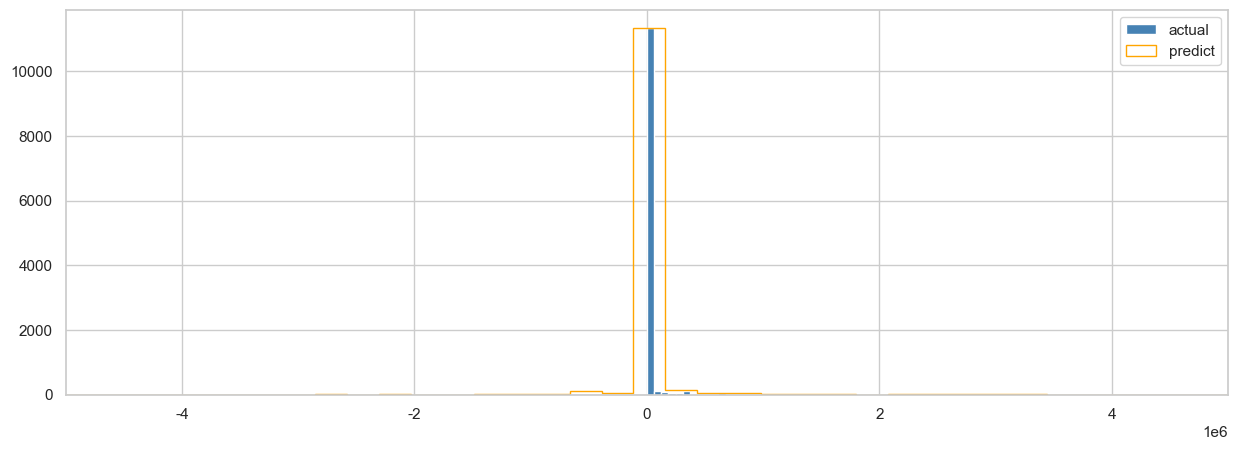

In [52]:
pd.set_option('display.float_format', '{:.2f}'.format)

bins = 100
plt.figure(figsize=(15, 5))

# 히스토그램 그리기
plt.hist(monetary_actual, bins, label='actual', histtype='bar', color='STEELBLUE', rwidth=0.99)
plt.hist(monetary_predicted, bins, label='predict', histtype='step', color='ORANGE', rwidth=0.99)

# x축 범위 설정
plt.xlim([-0.5e7, 0.5e7])

# 범례 추가
plt.legend(loc='upper right')

# 그래프 출력
plt.show()

### 모델 학습

In [53]:
final_df = whole_filtered_df.copy()
final_df['ltv'] = spend_model.customer_lifetime_value(lifetimes_model,
                                                     final_df['frequency'],
                                                     final_df['recency'],
                                                     final_df['T'],
                                                     final_df['monetary_value'],
                                                     time=12,
                                                     discount_rate=0.01 # monthly discount rate ~12.7% 연간
                                                     )

In [54]:
t=30 #365일
final_df['predicted_purchases'] = lifetimes_model.conditional_expected_number_of_purchases_up_to_time(t
                                                                                      , final_df['frequency']
                                                                                     , final_df['recency']
                                                                                     , final_df['T'])


In [55]:
final_df['predicted_monetary_value'] = spend_model.conditional_expected_average_profit(final_df['frequency']
                                                                    ,final_df['monetary_value'])


In [56]:
final_df.sort_values(by="ltv").tail(5)

,frequency,recency,T,monetary_value,ltv,predicted_purchases,predicted_monetary_value
customer_no,,,,,,,
2021064271082,2.00,2.00,2.00,2631000,406380445.63,3.05,11851378.24
2021018416015,4.00,88.00,142.00,27807550,451684606.56,0.88,45511556.68
2019123656735,2.00,59.00,68.00,15270585,725854154.03,0.94,68786569.96
2021018419857,2.00,113.00,121.00,45917000,1402914771.77,0.60,206833785.38
2020113745154,14.00,152.00,169.00,51315962,1487098926.98,2.29,57732523.65
